# __Analyzing an Automated Stock Trading Strategies__ 
### - Darshil Desai

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
%reload_ext autoreload
import importlib
import trade_script
importlib.reload(trade_script)
from trade_script import *

In [3]:
import importlib
import analysis_script
importlib.reload(analysis_script)
from analysis_script import *

import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# import seaborn as sns

## __Overview__
Here I present to you a project of mine where I look to identifying appropriate buy signals for U.S equities. The premise of this analysis lies is examining the lucrativeness of the logic I have developed to identify buy signals signals. 

The report will go as follows:
- 1. __Visualization Buy Signals__: First, I will showcase my logic "in action". Using visualizations, I would like to show you how my logic or "algorithm" specifies on which dates on which a stock should have been bought. 
       
       
- 2. __Visualizing Return Distributions__: Here I show the overall distribution of investment returns (positive and negative) should a certain asset be sold 2,5,10 and 20 days purchase on every buy date recommended by the algorithm. To shed light on this and offer clarity, I will expand on the matter below.

## __Visualizing Buy Signals__

The idea here is to evaluate, visually of course, how well my logic fares in the past. This strategy is known as "back-testing" which essentially implies that you can see how your algorithm would have performed had you hypothetically used this in the past. 

A key observation here is to the logic or algorithm I have developed does not take into the account future events, solely the past. Therefore, we can be assured that back-testing the logic is neither biased nor swayed by what has happened after each of the buy signals. If this seems rather convoluted, not to worry. I am perfectly happy to provide you with an example:

- Please refer to the plot below where you can see the dates, my algorithm recommends, to buy this stock (TIKR: _EXEL_). The arrows along with the annotated month-day allow you to visually gauge how well your investment would have done should you have bought the stock on the recommended dates. For instance, buying the stock on Jan 7th, 2019 would have had you enjoy the benefits of an upward run until about end of the month. Therefore, the value of returns (if any) you enjoy entirely depends on when you may choose to sell the equity.
    
However, as one can see, not all is well and good. There are times, such as May 21, 2019, where a short term investment would have seen a decrease in its value up until June 2019 where it would perhaps break-even! 

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


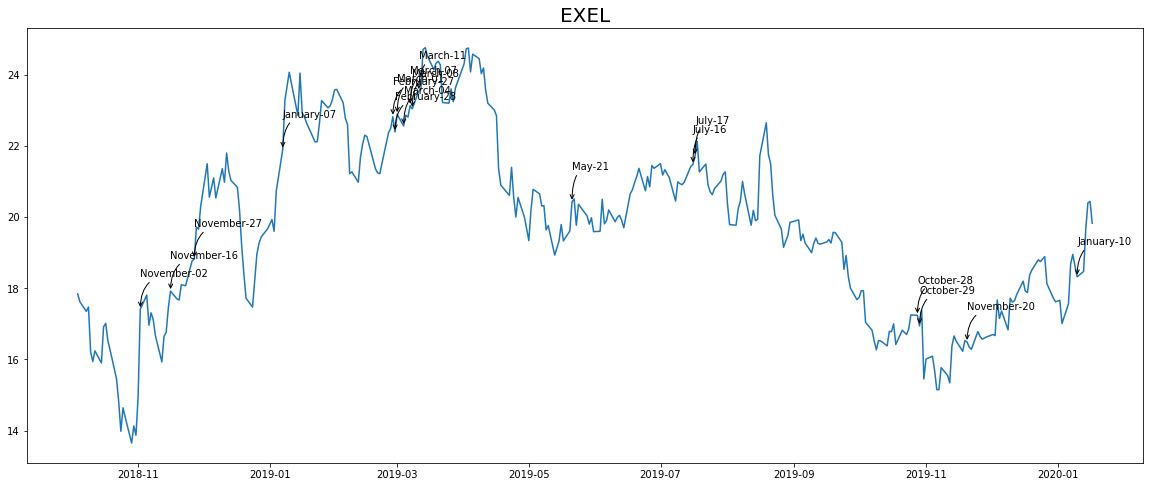

In [6]:
BuySignalAnalysis(stock_name = 'EXEL', signal_macdh_periods=4).plot_buysignals(show_from='2018-10-04')

## __Visualizing Return Distributions__

Here I simply seek to see how are the overall returns distributed should they have been sold _N_ day from date of purchase on the recommended buy signals offered by my algorithm. To understand this better, lets look at the subplots below. 

- On the top left, you can see that the investment returns should the stock (_EXEL_) have been sold 2 days after being bought at all the buy dates (some of which I show in the buy signal plot above) ,almost form a bell curve with the highest probably belonging to the group of returns between $\$0 - $\$1. 

- Top right you can see that selling the investment 5 days after being bought at all the buy dates (some of which I show in the buy signal plot above) recommended by the algorithm would result in the highest probability being assigned to the group of returns ranging between $\$0 - $\$-1. 

NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


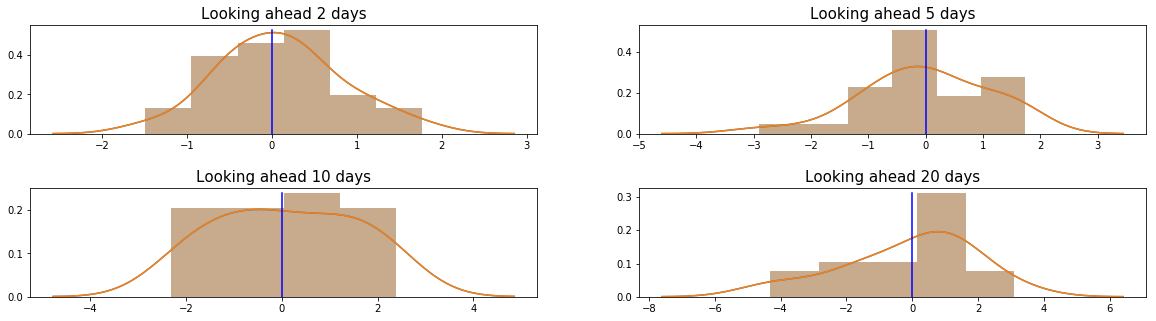

In [7]:
BuySignalAnalysis(stock_name = 'EXEL', signal_macdh_periods=4).plot_dists()

## __Methodology__
### __Why are we looking at return distributions after N days from buying an investment you may wonder?__ 

Well this brings me to the logic or algorithm I have alluded to earlier. In this analysis, I am trying to understand how I could "push my luck" if I were to set up a system wherein I could automatically buy equities on the recommended dates followed by blindly selling them N days after purchase. 

_FYI- Never on the same day though as buying & selling an excessive number of U.S equities (also known as day trading) on the same day is forbidden by the SEC unless you are legally approved to do so._

The reason for selling shortly after purchase stems from the logic I have built to identify the buy signals in the first place! You may have been wondering on what basis does my logic decide a certain day is good to buy a U.S equity? Well: __PENDING__

# __Analyzing Real Trade History__

In this section, I would like to visually analyze my past __paper__ trading activity. __Paper__ trading implies that equities were hypothetically bought using & done so using "fake" money. This approach allowed me to gauge how my strategies actually played out "in the real world" without of course incurring the risk of losing to a bad investment or the benefit of a good one!

In [8]:
df_for_viz_dict = StrategyAnalysis().generate_analysis_table(trade_type= 'development')
df_for_viz = df_for_viz_dict.get('final_df')

Not sold yet:  SMED
Not sold yet:  WATT
Not sold yet:  PLUG
Not sold yet:  CABA
Not sold yet:  BLNK
Not sold yet:  AMPY
Not sold yet:  OTLK
Not sold yet:  AGLE
Not sold yet:  AQST
Not sold yet:  BBGI
Not sold yet:  BIOC
Not sold yet:  AXLA
Not sold yet:  FTEK
Not sold yet:  AMRK
Not sold yet:  ADRO
Not sold yet:  AI
Not sold yet:  ARCT
Not sold yet:  ALNA
Not sold yet:  ALDX
Not sold yet:  AKTS
Not sold yet:  CVU
Not sold yet:  AMSC
ASPU
ACER
LMB
ATEC
APVO
ADMS
BOXL
ATHX
APTX
ARAY
CAPR


### Trading Activity Algorithmically Allocated Across Various Industries
The following visual shows that most of the trades were in the biotech industry. Followed by a category that has not been names yet. However, we would consider the "Drug Manufacturers", 'Medical Devises Industry", "Medical Instruments & Equipment" & "Biotechnology" to fall under one broad "Medicine" domain. This would mean that over 57% of the trades taken place have been in the medicine space. 

It is important to note that no additional conditions were applied in the logic with regarding to giving any particular industry or sector more importance than another. In fact, no considerations were given at all to equity meta data such as its industry. It "just so happened" that most of the trades were made in the medical space.

The __take away__ here could perhaps be that U.S equities in the medical space observed higher upward momentum, during the end of 2019 and beginning of 2020, than other industries. Using this information, I shall presumably direct my attention to medical stocks, particularily biotechnology, for future short term investment strategies. 

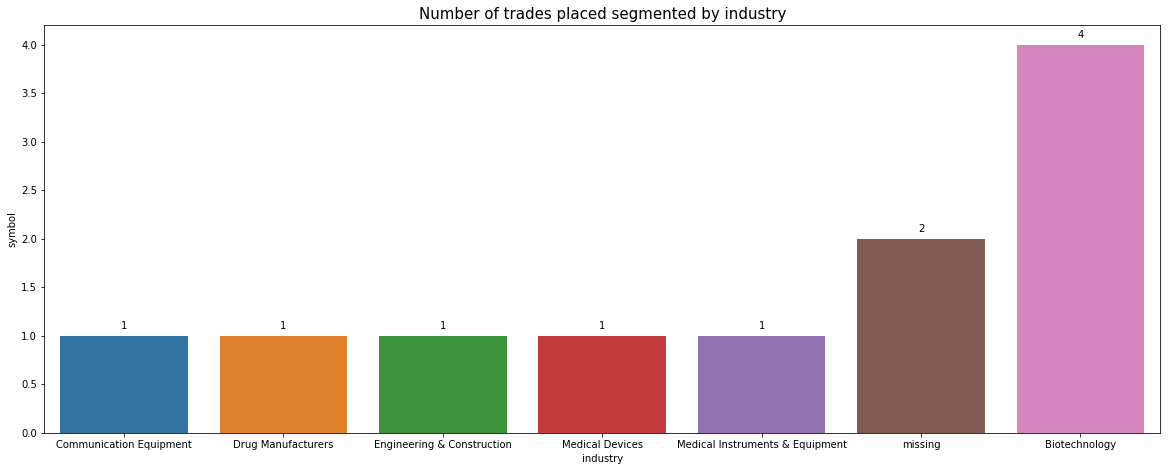

In [9]:
StrategyAnalysis().plot_count_by_industry(df_for_viz)

In [ ]:
# StrategyAnalysis().plot_median_gain_by_industry(df_for_viz)

In [ ]:
# StrategyAnalysis().plot_gain_by_asset(df_for_viz)

In [ ]:
# StrategyAnalysis().plot_trades_by_ind_gains(df_for_viz, num_bins=7)